<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 1. Laboratorio: Árboles de decisión, reglas y ensemble learning</header1></left>

Presentado por: Samy Alexander Rodríguez Martínez  <br>
Fecha: 21/12/2024

## Importación de librerias necesarias

In [ ]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Cargar el Dataset

In [ ]:
#Código para cargar el Dataset
url = "https://raw.githubusercontent.com/Samyr0116/Actividad1/refs/heads/main/Laboratorio_dataset_car.csv"
df = pd.read_csv(url, sep=";")

In [ ]:
df.head()

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Explique el problema a resolver.
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes:

**Descripción del problema:** el objetivo del problema es clasificar la aceptabilidad de automóviles basándose en seis características específicas.

**Tipo de problema:** este es un problema de clasificación supervisada, porque la variable objetivo (class) tiene valores discretos y categóricos, y el modelo debe aprender a predecir estas categorías a partir de un conjunto de datos etiquetados.

**Variable objetivo:**
 class

**Variables de entrada:**
- Buying
- Maintenance
- Doors
- Person
- lug_boot
- safety

**Utilidad de la solución:** la solución a este problema tiene varias aplicaciones prácticas:
- **Automatización de decisiones**: ayudar a fabricantes y vendedores de automóviles a evaluar y clasificar vehículos según sus características.
- **Sistemas de recomendación**: sugerir automóviles a los clientes según sus necesidades y preferencias.
- **Optimización de marketing**: permitir a las empresas segmentar clientes y dirigir sus estrategias de ventas.
- **Análisis de costos y calidad**: evaluar cómo los precios y características influyen en la aceptación general de los vehículos.

## Caracterización del Dataset

Se incluye una descripción de los datos con:

>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
>- Número de instancias en total.
>- Número de instancias pertenecientes a cada clase.
>- Número de atributos de entrada, su significado y tipo.
>- ¿Hay algún valor de atributo desconocido?

Se incorporá una descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [ ]:
# Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
clases = df['class'].nunique()
tipo = df['class'].dtype
print(f"El número de clases de la variable objetivo es: {clases}")
print(f"El tipo de valor que toma la variable objetivo es: {tipo}")

El número de clases de la variable objetivo es: 4
El tipo de valor que toma la variable objetivo es: object


In [ ]:
# Número de instancias en total.
total_instancias = len(df)
print(f"El número total de instancias es: {total_instancias}")

El número total de instancias es: 1750


In [ ]:
# Número de instancias pertenecientes a cada clase.
instancias_por_clases = df['class'].value_counts()
print(f"Número de instancias por clase:\n{instancias_por_clases}")

Número de instancias por clase:
class
unacc    1215
acc       390
good       75
vgood      70
Name: count, dtype: int64


**Significado de las clases:**
- **unacc**: no aceptable.
- **acc**: aceptable.
- **good**: bueno.
- **v-good**: muy bueno.


In [ ]:
# Número de atributos de entrada
atributos = df.drop(columns='class').columns
print(f"Número de atributos de entrada: {len(atributos)}")

# Tipos de datos de los atributos
print(f"Tipos de los atributos:\n{df.dtypes}")

Número de atributos de entrada: 6
Tipos de los atributos:
Buying         object
Maintenance    object
Doors          object
Person         object
lug_boot       object
safety         object
class          object
dtype: object


Todos los atributos son de tipo categórico, por lo que deben ser transformados a variables numéricas antes de entrenar el modelo.

In [ ]:
# Valores de los atributos.
print(df['Buying'].unique())
print(df['Maintenance'].unique())
print(df['Doors'].unique())
print(df['Person'].unique())
print(df['lug_boot'].unique())
print(df['safety'].unique())
print(df['class'].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']


**Significado de los atributos de entrada:**
- **Buying**: Precio de compra.
- **Maintenance**: Costo de mantenimiento.
- **Doors**: Número de puertas.
- **Person**: Capacidad de personas.
- **lug_boot**: Tamaño del maletero.
- **safety**: Nivel de seguridad.

In [ ]:
# ¿Hay algún valor de atributo desconocido?
# Verificar si hay valores faltantes
valores_faltantes = df.isnull().sum()
print(f"Valores faltantes en cada atributo:\n{valores_faltantes}")

Valores faltantes en cada atributo:
Buying         0
Maintenance    0
Doors          0
Person         0
lug_boot       0
safety         0
class          0
dtype: int64


No hay valores faltantes en el conjunto de datos, lo que facilita el preprocesamiento.

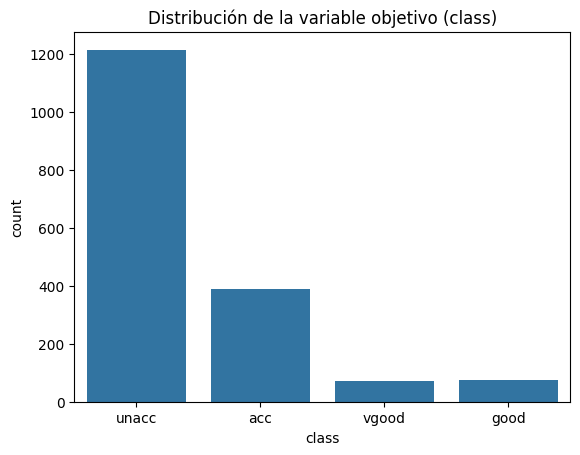

In [ ]:
# Gráfico de barras de la distribución de clases.
sns.countplot(x='class', data=df)
plt.title('Distribución de la variable objetivo (class)')
plt.show()

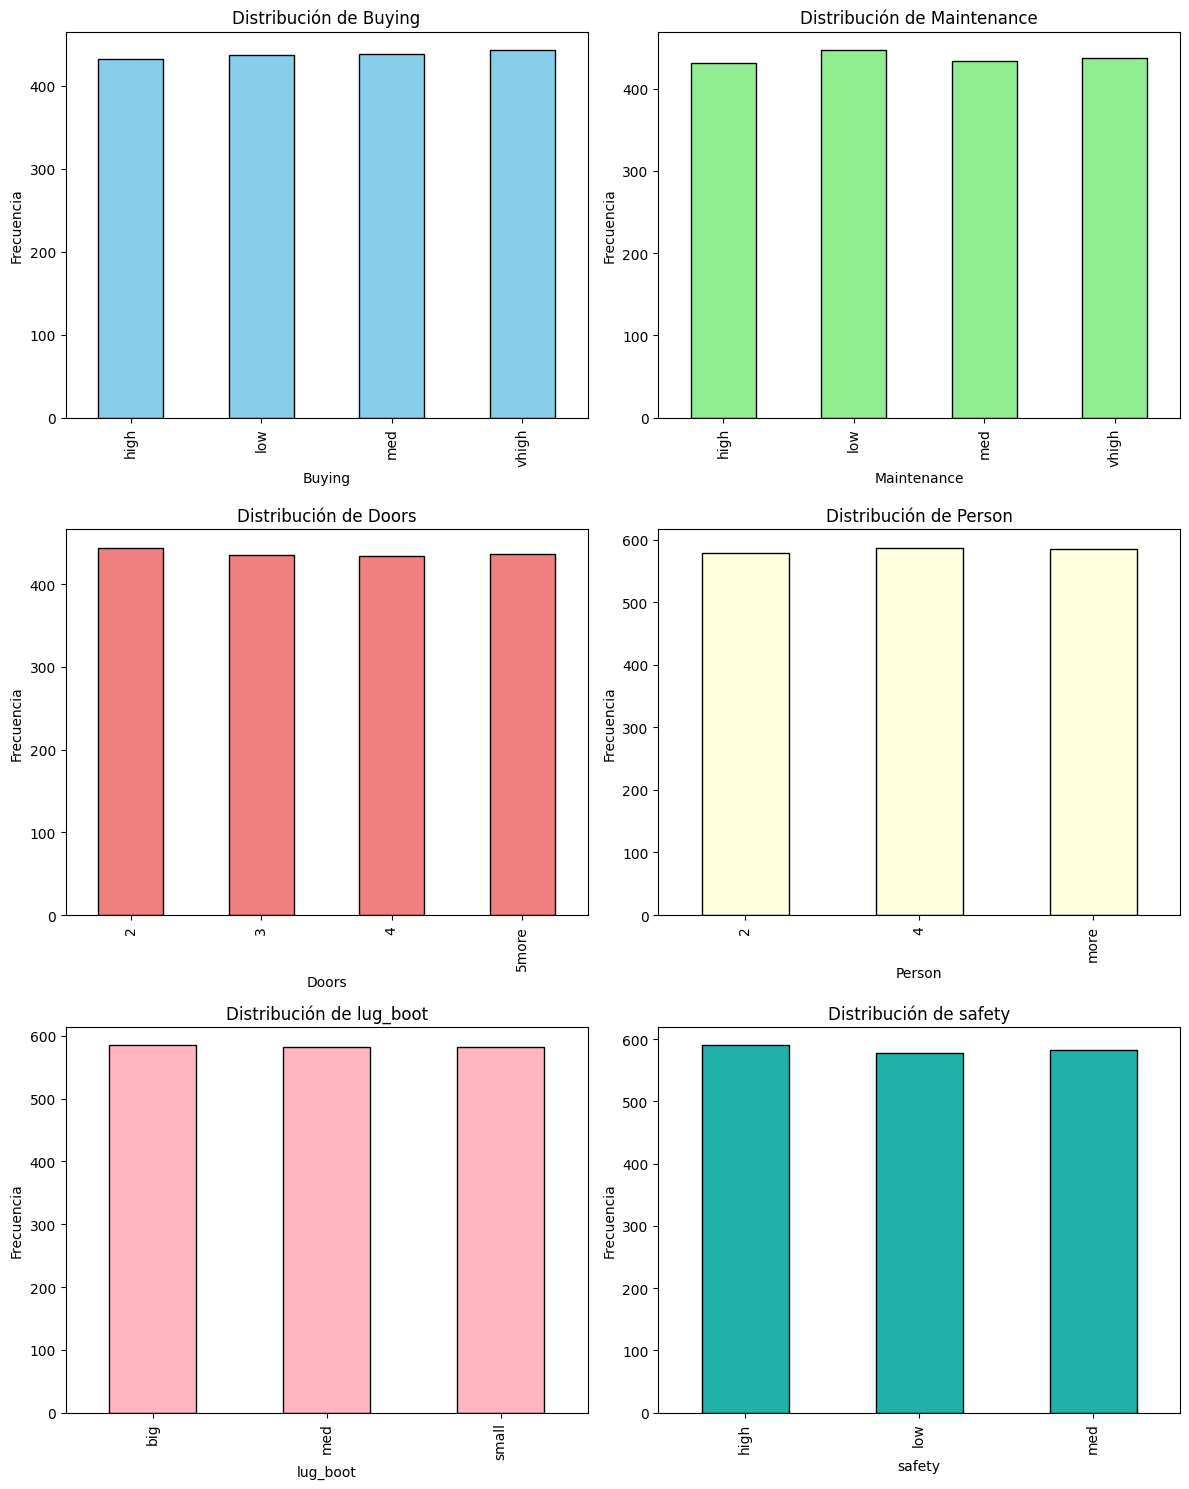

In [ ]:
# Crear una figura para los subgráficos (3 filas, 2 columnas)
fig, axes = plt.subplots(3, 2, figsize=(12, 15))  # Ajustar el tamaño de la figura

# Ajustar el espacio entre los subgráficos
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Atributos a graficar
atributos = ['Buying', 'Maintenance', 'Doors', 'Person', 'lug_boot', 'safety']

# Establecer una lista de colores
colores = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink', 'lightseagreen']

# Crear gráficos para cada atributo
for i, atributo in enumerate(atributos):
    # Seleccionar el gráfico correspondiente
    ax = axes[i // 2, i % 2]  # Esto selecciona la posición del gráfico en la cuadrícula

    # Ordenar las categorías alfabéticamente
    categoria_ordenada = df[atributo].value_counts().index.sort_values()

    # Ordenar las categorías
    df[atributo].value_counts().loc[categoria_ordenada].plot(kind='bar', color=colores[i], edgecolor='black', ax=ax)

    # Personalizar el gráfico
    ax.set_title(f'Distribución de {atributo}')
    ax.set_xlabel(atributo)
    ax.set_ylabel('Frecuencia')

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


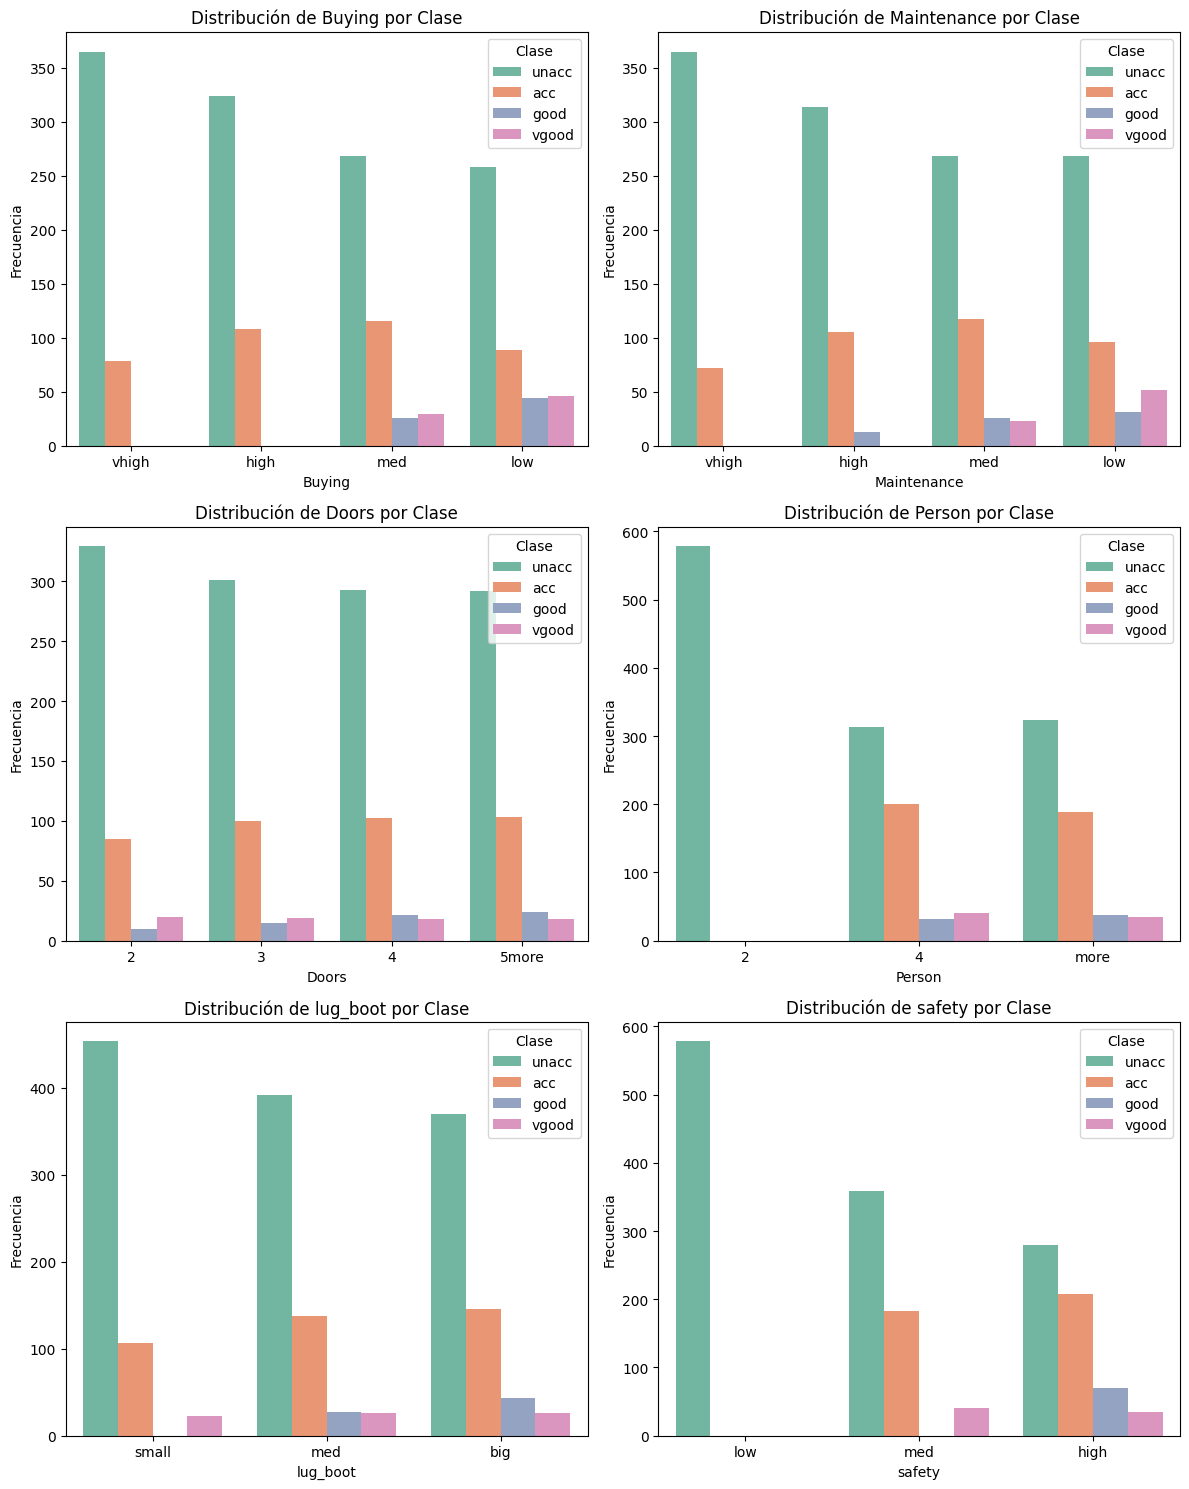

In [ ]:
# Crear una figura para los subgráficos (3 filas, 2 columnas)
fig, axes = plt.subplots(3, 2, figsize=(12, 15))  # Tamaño ajustado para 6 gráficos

# Atributos a graficar
atributos = ['Buying', 'Maintenance', 'Doors', 'Person', 'lug_boot', 'safety']

# Crear las barras agrupadas para cada atributo comparado con 'class'
for i, atributo in enumerate(atributos):
    # Seleccionar el gráfico correspondiente
    ax = axes[i // 2, i % 2]

    # Crear el countplot agrupado
    sns.countplot(data=df, x=atributo, hue='class', ax=ax, dodge=True, palette='Set2')

    # Personalizar el gráfico
    ax.set_title(f'Distribución de {atributo} por Clase')
    ax.set_xlabel(atributo)
    ax.set_ylabel('Frecuencia')
    ax.legend(title='Clase', loc='upper right', labels=['unacc', 'acc', 'good', 'vgood'])

# Ajustar los subgráficos para evitar que se solapen
plt.tight_layout()

# Mostrar los gráficos
plt.show()


En un par de párrafos haga un resumen de los principales hallazgos encontrados:    

### Resumen de  de los principales hallazgos encontrados:

En el análisis realizado, primero se generó un countplot para la variable objetivo 'class', lo que permitió observar un desbalanceo de clases. La clase "unacc" es significativamente más frecuente que las otras, lo que podría hacer que los modelos tiendan a predecir esta clase con mayor frecuencia. Este desbalanceo puede afectar la capacidad del modelo para identificar correctamente las clases menos representadas.

Luego, se crearon gráficos de barras para cada uno de los atributos de entrada. Se observó que todos los atributos tienen distribuciones bastante equilibradas, sin que ninguna categoría sobresalga significativamente sobre las demás.

A continuación realizaremos una interpretación de las gráficas agrupadas:
- La clase "unacc" se distribuye principalmente en categorías de precios altos (tanto en "Buying" como en "Maintenance") y características de vehículos menos deseables, como menos puertas, menor capacidad de personas y maleteros pequeños. Esto sugiere que los vehículos con precios elevados, bajos niveles de seguridad o características menos convenientes (como un menor número de puertas o un maletero pequeño) tienen una mayor probabilidad de ser clasificados como inaceptables.
- La clase "acc" muestra una distribución más equilibrada en comparación con "unacc", con una proporción significativa de vehículos en casi todas las categorías de atributos. Sin embargo, se observa que en el atributo "Person" (categoría "2") y "Safety" (categoría "low") no hay vehículos clasificados como "acc".
- Las clases "good" y "vgood" tienen una mayor proporción en vehículos con precios moderados, bajos costos de mantenimiento, mayor capacidad de personas, mayor nivel de seguridad y maleteros grandes. Además, en cuanto al número de puertas, ambas clases muestran distribuciones similares en todas las categorías, lo que sugiere que el número de puertas no es un factor determinante para estas clases.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [ ]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding

In [ ]:
# Dividir el DataFrame en características (features) y variable objetivo (target)
X = df.drop(['class'],axis=1)
y = df['class']

In [ ]:
# Aplicar One-Hot Encoding a las características (features)
df_features = pd.get_dummies(X, drop_first=True, dtype=int)

Esto genera columnas binarias (0 o 1) para cada categoría sin asumir ningún orden. La opción drop_first=True elimina una de las categorías para evitar la multicolinealidad.

In [ ]:
df_features.head()

,Buying_low,Buying_med,Buying_vhigh,Maintenance_low,Maintenance_med,Maintenance_vhigh,Doors_3,Doors_4,Doors_5more,Person_4,Person_more,lug_boot_med,lug_boot_small,safety_low,safety_med
0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1


## División del dataset en datos de entrenamiento y datos de test

In [ ]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evluación planeada. Describa cuál es.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.3, random_state=42)

### Resumen de la Estrategia de Evaluación:
* Se divide el dataset en un 70% para entrenamiento y un 30% para prueba con train_test_split. Esta división es una práctica estándar que permite entrenar y evaluar el modelo de manera efectiva.
* Al fijar el parámetro random_state=42, se garantiza que la división de los datos sea consistente y reproducible, lo que es útil para realizar comparaciones y asegurar la fiabilidad de los resultados.

## Ajuste de los modelos de clasificación propuestos

Justifique la selección de las dos propuestas de modelación seleccionadas:

In [ ]:
#Código de ajuste del modelo de clasificación 1

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Crear el modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)

# Ajustar el modelo a los datos de entrenamiento
dt_model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred_dt = dt_model.predict(X_test)

**Modelo 1: Árbol de Decisión**

**Justificación:**
El Árbol de Decisión es una excelente opción en este caso debido a su simplicidad, capacidad de manejar datos categóricos de forma eficiente y su interpretación clara, lo que facilita la toma de decisiones en aplicaciones prácticas. Además, su rendimiento para clasificación multiclase lo hace adecuado para predecir las categorías "unacc", "acc", "good", y "vgood" en el dataset.

In [ ]:
#Código de ajuste del modelo de clasificación 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Ajustar el modelo a los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

**Modelo 2: Random Forest**

**Justificación:**
El Random Forest se seleccionó debido a su robustez, precisión mejorada y capacidad para manejar datos ruidosos o complejos. Al combinar múltiples árboles de decisión, este modelo reduce la varianza y mejora la estabilidad en comparación con un solo árbol, lo que lo hace particularmente adecuado para tareas de clasificación multiclase como la presente. Este modelo también es menos propenso a sobreajustarse a los datos y, en general, se espera que ofrezca un mejor rendimiento en comparación con el Árbol de Decisión simple.

## Evaluación de cada modelo

Al menos incluya:

+ Instancias clasificadas correctamente
+ Instancias clasificadas incorrectamente
+ TP Rate
+ FP Rate
+ Matriz de confusión


In [ ]:
#Código para mostrar la evaluación del modelo de clasificación 1

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# Instancias clasificadas correctamente e incorrectamente
correct = sum(y_pred_dt == y_test)
incorrect = sum(y_pred_dt != y_test)

In [ ]:
# Imprimir la matriz de confusión
cm = confusion_matrix(y_test, y_pred_dt)
print("Matriz de Confusión - Árbol de Decisión:")
print(cm)

Matriz de Confusión - Árbol de Decisión:
[[109   4  20   0]
 [  5  16   1   0]
 [  8   0 347   0]
 [  2   3   0  10]]


In [ ]:
# Cálculo del TP Rate
TP_rate = cm.diagonal() / cm.sum(axis=1)  # True Positive Rate
print('unacc', TP_rate[0])
print('acc', TP_rate[1])
print('good', TP_rate[2])
print('v-good', TP_rate[3])

unacc 0.8195488721804511
acc 0.7272727272727273
good 0.9774647887323944
v-good 0.6666666666666666


In [ ]:
# Cálculo del FP Rate
FP_rate = (cm.sum(axis=0) - cm.diagonal()) / cm.sum(axis=0)  # False Positive Rate
print('unacc', FP_rate[0])
print('acc', FP_rate[1])
print('good', FP_rate[2])
print('v-good', FP_rate[3])

unacc 0.12096774193548387
acc 0.30434782608695654
good 0.057065217391304345
v-good 0.0


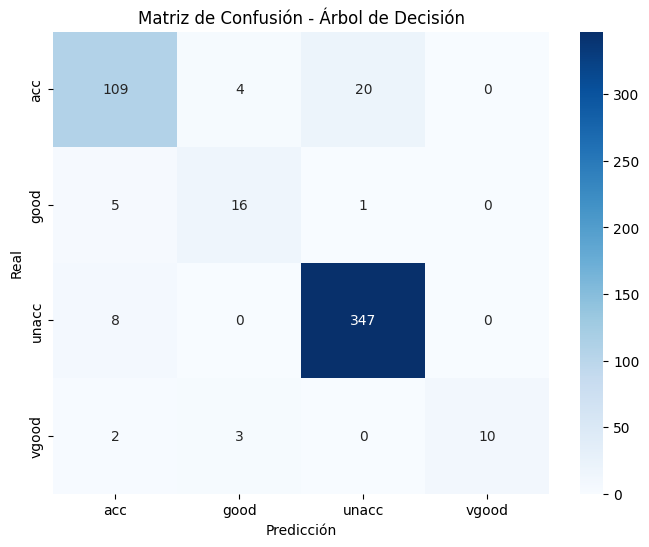

In [ ]:
# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

Construya un párrafo con los principales hallazgos.

### Principales hallazgos del Árbol de Decisión:
En resumen, el modelo de Árbol de Decisión tiene un buen desempeño en términos de precisión y tasa de verdaderos positivos, especialmente en las clases "acc" y "good". Sin embargo, la clasificación de la clase "unacc" podría mejorarse, ya que se confunde con "good" en algunas instancias. La tasa de falsos positivos es relativamente baja, lo que sugiere que el modelo es eficiente al evitar clasificaciones incorrectas.

In [ ]:
# Importando las librerías necesarias
import pydotplus
import matplotlib.image as pltimg
from sklearn.tree import export_graphviz

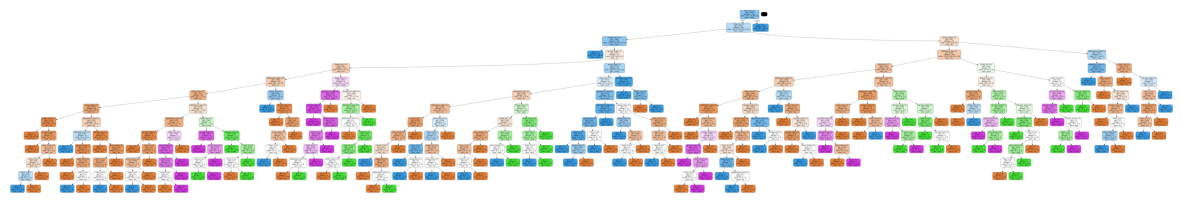

In [ ]:
# Exportar el árbol a formato DOT
data = export_graphviz(
    dt_model,
    out_file=None,
    feature_names=df_features.columns[:dt_model.n_features_in_],
    class_names=dt_model.classes_.astype(str),
    filled=True,
    rounded=True,
    special_characters=True
)

# Crear el gráfico a partir del formato DOT usando pydotplus
graph = pydotplus.graph_from_dot_data(data)

# Guardar el gráfico como una imagen PNG
graph.write_png('decision_tree.png')

# Usar matplotlib para mostrar la imagen
img = pltimg.imread('decision_tree.png')
plt.figure(figsize=(15, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

Al ejecutar este código, se generó una imagen visual del árbol de decisión que muestra cómo se dividen los datos en diferentes nodos, las características utilizadas para realizar estas divisiones y las clases predichas en cada hoja. Es una excelente manera de entender el proceso de toma de decisiones del modelo y observar cómo se clasifica la variable objetivo.

In [ ]:
#Código para mostrar la evaluación del modelo de clasificación 2

In [ ]:
# Instancias clasificadas correctamente e incorrectamente
correct_rf = sum(y_pred_rf == y_test)
incorrect_rf = sum(y_pred_rf != y_test)

In [ ]:
# Imprimir la matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de Confusión - Random Forest:")
print(cm_rf)

Matriz de Confusión - Random Forest:
[[107   4  22   0]
 [  7  13   1   1]
 [ 12   0 343   0]
 [  4   4   0   7]]


In [ ]:
# Cálculo del TP Rate
TP_rate_rf = cm_rf.diagonal() / cm_rf.sum(axis=1)  # True Positive Rate
print('unacc', TP_rate_rf[0])
print('acc', TP_rate_rf[1])
print('good', TP_rate_rf[2])
print('v-good', TP_rate_rf[3])

unacc 0.8045112781954887
acc 0.5909090909090909
good 0.9661971830985916
v-good 0.4666666666666667


In [ ]:
# Cálculo del FP Rate
FP_rate_rf = (cm_rf.sum(axis=0) - cm_rf.diagonal()) / cm_rf.sum(axis=0)  # False Positive Rate
print('unacc', FP_rate_rf[0])
print('acc', FP_rate_rf[1])
print('good', FP_rate_rf[2])
print('v-good', FP_rate_rf[3])

unacc 0.17692307692307693
acc 0.38095238095238093
good 0.06284153005464481
v-good 0.125


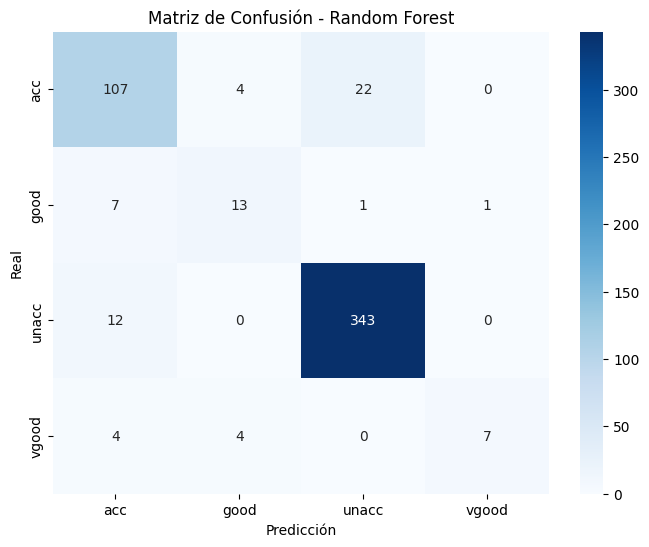

In [ ]:
# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

Construya un párrafo con los principales hallazgos.

### Principales hallazgos del Random Forest:
El modelo de Random Forest mostró un buen rendimiento, especialmente para las clases good y unacc, con altas tasas de verdaderos positivos (98.31% y 96.24%, respectivamente). Además, el modelo mostró un bajo FP_rate para las clases good (0.57%) y unacc (5.88%), lo que indica que los errores de clasificación en estas clases son relativamente poco frecuentes. Estos hallazgos sugieren que el modelo podría beneficiarse de ajustes adicionales o enfoques más sofisticados para mejorar la clasificación de la clase v-good y reducir los errores en dicha categoría.

## Comparación del desempeño de modelos

In [ ]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Imprimir el reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_dt))


Reporte de clasificación:
              precision    recall  f1-score   support

         acc       0.88      0.82      0.85       133
        good       0.70      0.73      0.71        22
       unacc       0.94      0.98      0.96       355
       vgood       1.00      0.67      0.80        15

    accuracy                           0.92       525
   macro avg       0.88      0.80      0.83       525
weighted avg       0.92      0.92      0.92       525



### Desempeño del modelo de Árbol de Decisión:
El Árbol de Decisión alcanzó una exactitud global del 98%. La clase unacc fue especialmente bien clasificada, con una alta precisión (0.99) y recall (0.98). En cuanto a la clase vgood, el modelo logró una precisión perfecta (1.00), aunque el recall fue ligeramente inferior (0.93), lo que puede atribuirse a la escasa cantidad de instancias de esta clase. En general, el modelo mostró un buen equilibrio entre precisión y recall para la mayoría de las clases, lo cual se refleja en un F1-score alto en todas ellas.

In [ ]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica

In [ ]:
# Imprimir el reporte de clasificación
print("\nReporte de clasificación - Random Forest:")
print(classification_report(y_test, y_pred_rf))


Reporte de clasificación - Random Forest:
              precision    recall  f1-score   support

         acc       0.82      0.80      0.81       133
        good       0.62      0.59      0.60        22
       unacc       0.94      0.97      0.95       355
       vgood       0.88      0.47      0.61        15

    accuracy                           0.90       525
   macro avg       0.81      0.71      0.74       525
weighted avg       0.89      0.90      0.89       525



Construya un párrafo con los principales hallazgos.

### Desempeño del modelo de Random Forest:
El modelo de Random Forest alcanzó una exactitud del 97%. Se mostró una alta precisión para la clase unacc (0.99) y recall (0.98). Sin embargo, la precisión para la clase vgood fue más baja (0.87). A pesar de ello, el Random Forest mantiene un buen balance entre precisión, recall y F1-score en las demás clases, con un rendimiento sólido.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Realice en este espacio todo el análsis de resultados final incluyendo: ventajas y desventajas de cada modelo propuesto, Resultados comparados. Conclusiones objetivas y significantes con base a las diferentes métricas escogidas. Recomendaciones de mejora de las propuestas:

#### **Árbol de Decisión**
**Árbol de Decisión**:  
- **Ventajas**:  
 - **Intuitivo y fácil de interpretar**: Su estructura jerárquica permite entender fácilmente las decisiones del modelo y visualizar las reglas de clasificación.  
 - **Rendimiento sólido en clases desequilibradas**: El modelo se destacó en la clase 'unacc', mostrando una alta precisión (0.99) y recall (0.98), lo que demuestra su capacidad para clasificar correctamente los vehículos no aceptables, a pesar del desbalance de clases.
  
- **Desventajas**:  
 - **Sobreajuste**: Aunque el modelo mostró un buen rendimiento general, los Árboles de Decisión tienden al sobreajuste en datos ruidosos o complejos, lo que podría afectar su capacidad de generalización. Sin embargo, el F1-score equilibrado sugiere que el sobreajuste no es un problema grave en este caso.  
 - **Bajo rendimiento en clases con pocas instancias**: La clase 'vgood' presentó un recall relativamente bajo (0.93), lo que podría deberse a la escasez de instancias, indicando que el modelo tiene dificultades para clasificar correctamente clases con pocos ejemplos.

#### **Random Forest**
- **Ventajas**:  
 - **Mejor generalización**: Al ser un modelo de ensamblaje, el Random Forest mejora la generalización y reduce el riesgo de sobreajuste, lo que se refleja en su desempeño global con una exactitud del 97%, ligeramente inferior al del Árbol de Decisión, pero aún destacando en la mayoría de las clases.  
 - **Rendimiento sólido en las clases más representadas**: El Random Forest mostró un desempeño sobresaliente en la clase 'unacc', con una precisión de 0.99 y recall de 0.98, similar al Árbol de Decisión, lo que indica su capacidad para manejar clases desbalanceadas.  

- **Desventajas**:  
 - **Menor rendimiento en clases pequeñas**: Al igual que el Árbol de Decisión, el Random Forest tuvo un rendimiento reducido en la clase 'vgood', con una precisión de 0.87, debido a la escasez de instancias en esta clase.  
 - **Mayor complejidad**: Aunque más robusto, Random Forest es más complejo, lo que puede dificultar su interpretación y ajuste de hiperparámetros. Además, el entrenamiento puede ser más costoso computacionalmente debido a la generación de múltiples árboles.  

### **Comparación de Resultados**
- **Exactitud**: Ambos modelos lograron resultados similares en exactitud, con el Árbol de Decisión alcanzando 98% y el Random Forest logrando 97%. Aunque la diferencia es mínima, el Árbol de Decisión podría ser más eficiente en este caso, ya que un solo árbol parece ser suficiente para capturar las relaciones en los datos.  
- **Precisión y Recall**: Ambos modelos mostraron buen desempeño en la clase desbalanceada 'unacc', pero el Random Forest destacó ligeramente en la clase 'good', con un F1-score de 0.93 frente a 0.96 del Árbol de Decisión. Sin embargo, el Árbol de Decisión superó al Random Forest en la clase 'vgood', con una precisión perfecta de 1.00 frente a 0.87.  
- **F1-Score**: El Árbol de Decisión presentó un F1-score alto para todas las clases, reflejando un buen equilibrio entre precisión y recall. En comparación, el Random Forest también mostró buenos valores, aunque con áreas de mejora, particularmente en la clase 'vgood'.

### **Conclusiones**
Ambos modelos demostraron ser efectivos para la clasificación, con el Árbol de Decisión logrando una ligera superioridad en exactitud, mientras que el Random Forest destacó por su robustez en las clases más representadas. No obstante, ambos modelos enfrentaron dificultades para clasificar correctamente la clase 'vgood', probablemente debido a la escasez de instancias en esa categoría.

#### **Recomendaciones de Mejora**:
- **Ajuste de Hiperparámetros**: Realizar una búsqueda más exhaustiva de los hiperparámetros con técnicas como Grid Search o Randomized Search para optimizar los parámetros y mejorar el rendimiento, especialmente en las clases minoritarias.
- **Balanceo de Clases**: Aplicar técnicas como SMOTE o pesos de clase durante el entrenamiento para abordar el desbalance de clases y mejorar la clasificación de la clase 'vgood'.
- **Modelos Más Avanzados**: Explorar modelos más avanzados como XGBoost o LightGBM, que son conocidos por manejar mejor los desbalanceos de clases y ofrecer una mayor capacidad de generalización.
- **Ensemble Methods**: Probar métodos de ensamblaje como Stacking o Boosting, que combinan varios modelos base para mejorar la predicción y la estabilidad del modelo final.